# Proceso de Limpieza de Datos
*por Andrés Calderón Bernal*, en *Riohacha*

## Descripción del Caso
Más de cinco mil aplicantes para aprendiz del Servicio Nacional de Aprendizaje (SENA), en Colombia, tomaron un exámen escrito en las áreas de Razonamiento Cuantitativo, Comprensión Lectora e Inglés. También proporcionaron su fecha de nacimiento, la ciudad de procedencia, y su sexo. Toda esta información está contenida en un archivo CSV. Antes de emplear dichos datos, se debe verificar que los mismos sean válidos para su análisis. Para ello, se inicia un proceso de limpieza de datos, donde se suprimirán las filas con celdas nulas y datos por fuera de los parámetros establecidos.

## Descripción de los Datos
Las columnas del dataframe a crear, llamado _enbruto_, son: "*Sexo*", que puede ser «Femenino», «Masculino», o «NR/Otro»; "*Ciudad*", la ciudad colombiana donde actualmente reside la persona que tomó el exámen; "*Fecha de Nacimiento*", la fecha en que nació la persona que tomó el exámen, fecha que no puede ser anterior a 1960 ni ulterior a 2010; "*Nota Razonamiento Cuantitativo"*, "*Nota Comprension Lectora*" y "*Nota Ingles*", cuyo valor mínimo es 1.0 y el máximo 5.0.

Los datos de las columnas *Sexo* y *Ciudad* son categóricos nominales, los de *Fecha de Nacimiento* son categóricos ordinales, y los de las tres columnas de notas son numéricos (cuantitativos) continuos.

Para iniciar —tras importar pandas, desde luego—, se lee el archivo CSV por medio de la función *read_csv*. Cabe resalatar que tanto dicho archivo CSV como el archivo desde donde se llama —en este caso, un archivo con extensión .ipynb— deben estar en un mismo directorio. Se crea la función *contar_columnas* (cuyo parámetro es un dataframe), donde la variable columnas tendrá asignado una lista de NumPy que captará todos los nombres de las columnas del dataframe. La función **len()** obtendrá la cantidad de índices de dicha lista, que a su vez es la cantidad de columnas de nuestro dataframe.

In [1]:
import pandas as pd

enbruto = pd.read_csv('datos_en_bruto.csv')

def contar_columnas(df):
    columnas = list(df.columns.values)
    cantidad_columnas = len(columnas)
    print(f'Las columnas del dataframe son: {columnas}')
    print(f'El dataframe tiene {cantidad_columnas} columnas.')

contar_columnas(enbruto)
print("════════════════════════════════════════════════════")
enbruto.info()
print("════════════════════════════════════════════════════")
enbruto

Las columnas del dataframe son: ['Sexo', 'Ciudad', 'Fecha de Nacimiento', 'Nota Razonamiento Cuantitativo', 'Nota Comprension Lectora', 'Nota Ingles']
El dataframe tiene 6 columnas.
════════════════════════════════════════════════════
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sexo                            5021 non-null   object 
 1   Ciudad                          5017 non-null   object 
 2   Fecha de Nacimiento             5021 non-null   object 
 3   Nota Razonamiento Cuantitativo  5022 non-null   float64
 4   Nota Comprension Lectora        5022 non-null   float64
 5   Nota Ingles                     5021 non-null   float64
dtypes: float64(3), object(3)
memory usage: 235.6+ KB
════════════════════════════════════════════════════


,Sexo,Ciudad,Fecha de Nacimiento,Nota Razonamiento Cuantitativo,Nota Comprension Lectora,Nota Ingles
0,Femenino,Bucaramanga,1997-11-27,2.0,1.7,1.8
1,NaN,Maicao,2002-04-06,2.0,2.6,2.5
2,Masculino,Maicao,1998-03-11,2.1,2.0,1.9
3,M,Sogamoso,1997-11-03,2.7,2.5,1.8
4,Femenino,Maicao,2001-09-07,2.4,1.5,3.1
...,...,...,...,...,...,...
5018,M,Riohacha,2000-06-18,2.8,1.2,2.0
5019,M,Valledupar,2000-01-03,3.6,1.0,1.8
5020,M,Bosconia,1998-12-27,2.0,1.6,1.2
5021,Femenino,Bbermeja,1999-11-29,3.0,2.4,2.5


**Primer Paso**:
Identificar las filas con valores nulos. Para esto, se extraen las filas con uno o más valores nulos en alguna de sus columnas de _enbruto_, las cuales se almacenarán en un nuevo dataframe llamado _filasconnulos_. Esto se logra mediante la función **isnull()**, que asigna el booleano True a cada valor NaN. El argumento _axis=1_ indica que se debe hacer la operación de verificación a lo largo de cada fila. La función any() devuelve True si al menos una celda de esa fila contiene un valor True asignado mediante isnull(). La estructura enbruto[], que contiene todo el filtro anterior, permite extraer las filas obtenidas de dataframe original al nuevo.

In [2]:
filasconnulos = enbruto[enbruto.isnull().any(axis=1)]
print(f'Número de filas con valores nulos: {len(filasconnulos)}')
filasconnulos

Número de filas con valores nulos: 12


,Sexo,Ciudad,Fecha de Nacimiento,Nota Razonamiento Cuantitativo,Nota Comprension Lectora,Nota Ingles
1,NaN,Maicao,2002-04-06,2.0,2.6,2.5
183,Masculino,NaN,2004-02-02,2.2,1.2,2.4
196,NaN,Barrancabermeja,2004-10-02,2.1,1.3,2.1
1240,f,El Copey,NaN,NaN,4.5,3.0
1355,M,NaN,2002-02-05,0.0,1.8,2.8
1641,Femenino,NaN,2005-11-11,2.0,2.7,2.8
1690,Masculino,Aguachica,NaN,2.2,1.1,2.8
1734,Femenino,NaN,2007-08-01,1.5,2.1,4.7
1976,Masculino,NaN,2002-12-01,1.9,2.3,1.4
2007,Masculino,NaN,2006-07-26,1.7,1.1,1.6


Hay doce filas con valores nulos. La columna "Ciudad" es la que más valores nulos tiene. Todas las celdas son necesarias para llevar a cabo el proceso de análisis de datos, así que tales filas inconclusas se eliminarán. Para hacerlo, se llama la función _dropna()_. El dataframe enbruto tiene un total de 5023 filas; tras la depuración, este número se reducirá a **5011**.

In [3]:
enbruto = enbruto.dropna()
print(f'Número de filas después de eliminar los nulos: {len(enbruto)}')
print("════════════════════════════════════════════════════")
enbruto.info()
print("════════════════════════════════════════════════════")
enbruto

Número de filas después de eliminar los nulos: 5011
════════════════════════════════════════════════════
<class 'pandas.core.frame.DataFrame'>
Index: 5011 entries, 0 to 5022
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sexo                            5011 non-null   object 
 1   Ciudad                          5011 non-null   object 
 2   Fecha de Nacimiento             5011 non-null   object 
 3   Nota Razonamiento Cuantitativo  5011 non-null   float64
 4   Nota Comprension Lectora        5011 non-null   float64
 5   Nota Ingles                     5011 non-null   float64
dtypes: float64(3), object(3)
memory usage: 274.0+ KB
════════════════════════════════════════════════════


,Sexo,Ciudad,Fecha de Nacimiento,Nota Razonamiento Cuantitativo,Nota Comprension Lectora,Nota Ingles
0,Femenino,Bucaramanga,1997-11-27,2.0,1.7,1.8
2,Masculino,Maicao,1998-03-11,2.1,2.0,1.9
3,M,Sogamoso,1997-11-03,2.7,2.5,1.8
4,Femenino,Maicao,2001-09-07,2.4,1.5,3.1
5,Femenino,Valledupar,1996-12-22,1.3,2.3,1.2
...,...,...,...,...,...,...
5018,M,Riohacha,2000-06-18,2.8,1.2,2.0
5019,M,Valledupar,2000-01-03,3.6,1.0,1.8
5020,M,Bosconia,1998-12-27,2.0,1.6,1.2
5021,Femenino,Bbermeja,1999-11-29,3.0,2.4,2.5


**Paso Dos**: Verificar que los valores ingresados coincidan con los criterios establecidos. Se empieza con la columna "Fecha de Nacimiento", donde las fechas deben estar dentro del intervalo 1960-2010.

Para empezar, se determina que el año de la fecha sea válido, por lo que se procede a verificar si los hay de tres o dos cifras. Para ello, se importa la librería de expresiones regulares **re** y se crea la función *filtrar_años_dos_tres_cifras*, cuyos parámetros son el dataframe y la columna. Dentro, la función **astype()** convierte los valores de la columna "Fecha de Nacimiento" a string *(str)*. Dentro de la función **match()** es donde se emplea una expresión regular para buscar el patrón indicado, en este caso fechas con años de dos y tres cifras —*\d{2,3}*— en donde va el año dentro de la fecha.

Todas las filas que cumplan con tal criterio harán parte del dataframe *años_dos_tres_cifras*, donde se muestran todas las celdas de la fila, incluído el índice (index), que es su identificador único.

In [4]:
import re

def filtrar_años_dos_tres_cifras(df, columna):
    dos_tres_cifras = df[df[columna].astype(str).str.match(r'^\d{2,3}-\d{2}-\d{2}$')]
    if dos_tres_cifras.empty:
        print("║ No hay ningún año con dos o tres cifras ║")
    else:
        return dos_tres_cifras


años_dos_tres_cifras = filtrar_años_dos_tres_cifras(enbruto, 'Fecha de Nacimiento')
años_dos_tres_cifras

,Sexo,Ciudad,Fecha de Nacimiento,Nota Razonamiento Cuantitativo,Nota Comprension Lectora,Nota Ingles
775,Masculino,Tauramena,200-06-03,3.4,1.2,15.0
1586,M,Sogampso,199-06-15,4.6,3.2,3.5
2335,F,Tibirita,93-11-11,2.5,2.3,3.1
2399,M,Bosconia,06-06-10,4.1,2.7,3.3
3801,Masculino,Valledupar,07-12-17,3.4,1.4,2.9
4381,NSNR,sogamoso,987-12-02,2.5,1.9,2.8
4434,M,Bbermeja,91-12-16,3.4,1.5,2.4


**Hallazgo**: Siete filas presentan años de dos y tres cifras. Dentro de las de años de dos cifras —*93, 06, 07, 91*—, es posible conservar los datos. Dentro de las de años de tres cifras, hay dos —*200, 199*— donde no es posible determinar el año al que se refieren; la fila restante presenta un año *987*, así que se entenderá que se refiere a 1987.

Por lo anterior, se procede a eliminar las filas con años *199* y *200*. y la fecha con año *987* pasará a ser 1987. El método **drop()** se usa para eliminar filas o columnas; el parámetro index[], por su parte, señala los índices de las filas a eliminar. Para modificar valores de la filas, se emplea el método **loc[índice, columna]**, dentro del cuál se define el índice de la fila, el *index*, y el nombre de la columna; con el operador = se indica el nuevo valor que tendrá dicha celda.

Con esto, la cantidad de filas de nuestro dataframe se reduce a **5009**.

In [5]:
enbruto.loc[4381, 'Fecha de Nacimiento'] = '1987-12-02'
enbruto = enbruto.drop(index=[775, 1586])
print("════════════════════════════════════════════════════")
print(enbruto.loc[4381])
print("════════════════════════════════════════════════════")
enbruto.info()


════════════════════════════════════════════════════
Sexo                                    NSNR
Ciudad                              sogamoso
Fecha de Nacimiento               1987-12-02
Nota Razonamiento Cuantitativo           2.5
Nota Comprension Lectora                 1.9
Nota Ingles                              2.8
Name: 4381, dtype: object
════════════════════════════════════════════════════
<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 5022
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sexo                            5009 non-null   object 
 1   Ciudad                          5009 non-null   object 
 2   Fecha de Nacimiento             5009 non-null   object 
 3   Nota Razonamiento Cuantitativo  5009 non-null   float64
 4   Nota Comprension Lectora        5009 non-null   float64
 5   Nota Ingles                     5009 non-null   float64
dtypes: f

En cuanto a las filas con fechas con años de dos cifras, dado que son solo cuatro, se modificarán directamente. Para ello, se crea el diccionario *actualizaciones*, donde cada pareja clave-valor corresponderá al índice y la fecha corregida de las filas a limpiar. Después, se emplea un ciclo for para recorrer todos las parejas del diccionario, por medio de las variables indice (para la clave) y fecha_corregid (para el valor), y de la función **items()**, que devuelve cada pareja por iteración. Dentro del ciclo, se emplea el método **loc[índice, columna]** para actualizar las fechas no válidas.

In [6]:
actualizaciones = {
    2335: '1993-11-11', 2399: '2006-06-10', 3801: '2007-12-17', 4434: '1991-12-16' }

for indice, fecha_corregida in actualizaciones.items():
    enbruto.loc[indice, 'Fecha de Nacimiento'] = fecha_corregida
    print(enbruto.loc[indice])

print("════════════════════════════════════════════════════")
filtrar_años_dos_tres_cifras(enbruto, 'Fecha de Nacimiento')

Sexo                                       F
Ciudad                              Tibirita
Fecha de Nacimiento               1993-11-11
Nota Razonamiento Cuantitativo           2.5
Nota Comprension Lectora                 2.3
Nota Ingles                              3.1
Name: 2335, dtype: object
Sexo                                       M
Ciudad                              Bosconia
Fecha de Nacimiento               2006-06-10
Nota Razonamiento Cuantitativo           4.1
Nota Comprension Lectora                 2.7
Nota Ingles                              3.3
Name: 2399, dtype: object
Sexo                               Masculino
Ciudad                            Valledupar
Fecha de Nacimiento               2007-12-17
Nota Razonamiento Cuantitativo           3.4
Nota Comprension Lectora                 1.4
Nota Ingles                              2.9
Name: 3801, dtype: object
Sexo                                       M
Ciudad                              Bbermeja
Fecha de Nacimiento   

Prosiguiendo, ahora se va a verificar que los años de cuatro cifras de las fechas, no sean anteriores a 1960 ni ulteriores a 2010. Para ello, se creará una columna auxiliar llamada *Año*, en la que se inserta el año sustraído de la fecha en *Fecha de Nacimiento* como cadena de texto usando el método **extract()**. Luego, por medio de la función **to_numeric()**, se tranforma a número.

Dado que que los años a detectar pueden estar bastante distantes del tiempo actual —por ejemplo, 2999 o 1010—, se hace lo anterior en vez de tranformar las fechas a datetime (fecha y hora), en dado caso habría error. Esto, teniendo en cuenta que la columna "Fecha de Nacimiento* es de tipo object.

Hecho lo anterior, se filtran las filas cuya fecha contenga un año menor a 1960 y mayor a 2010 y se almacenan dentro del dataframe *filas_años_incorrectos*:

In [7]:
enbruto['Año'] = enbruto['Fecha de Nacimiento'].str.extract(r'(\d{4})')
enbruto['Año'] = pd.to_numeric(enbruto['Año'], errors='coerce')

filas_años_incorrectos = enbruto[(enbruto['Año'] < 1960) | (enbruto['Año'] > 2010)]
filas_años_incorrectos


,Sexo,Ciudad,Fecha de Nacimiento,Nota Razonamiento Cuantitativo,Nota Comprension Lectora,Nota Ingles,Año
786,Femenino,Bucaramanga,2997-11-01,4.3,1.3,1.9,2997
845,Masculino,Yopal,1004-12-11,3.5,3.8,3.8,1004
951,Masculino,Maicao,2104-01-08,3.2,1.7,1.9,2104
1063,Femenino,Yopal,2997-03-31,1.1,2.0,1.7,2997
4638,Masculino,Aguachica,2101-05-01,2.8,1.3,2.4,2101


**Hallazgo**: Cinco filas presentan años fuera del intervalo 1960-2010. Dos con *2997*, que se asumirá es 1997. Las tres restantes —*1004*, *2101* y *2104*—, se asumirán como 2004, 2001 y 2004 respectivamente. De nuevo, se emplea un diccionario y un ciclo for para la actualización de las filas afectadas.

Habiendo arreglado todas las filas con fechas de formato incorrecto, ya no es necesario conservar la columna *Año*. Para eliminarla, se emplea la función **drop()** con el parámetro *columns*. Se llama la función *contar_columnas* para verificar que sí haya sido eliminada.

In [8]:
actualizaciones = {
    786: '1997-11-01', 845: '2004-12-11', 951: '2004-01-08', 1063: '1997-03-31', 4638: '2001-05-01' }

for indice, fecha_corregida in actualizaciones.items():
    enbruto.loc[indice, 'Fecha de Nacimiento'] = fecha_corregida
    print(enbruto.loc[indice])
    print("════════════════════════════════════════════════════")
    
contar_columnas(enbruto)
enbruto.drop(columns=['Año'], inplace=True)
contar_columnas(enbruto)

Sexo                                 Femenino
Ciudad                            Bucaramanga
Fecha de Nacimiento                1997-11-01
Nota Razonamiento Cuantitativo            4.3
Nota Comprension Lectora                  1.3
Nota Ingles                               1.9
Año                                      2997
Name: 786, dtype: object
════════════════════════════════════════════════════
Sexo                               Masculino
Ciudad                                 Yopal
Fecha de Nacimiento               2004-12-11
Nota Razonamiento Cuantitativo           3.5
Nota Comprension Lectora                 3.8
Nota Ingles                              3.8
Año                                     1004
Name: 845, dtype: object
════════════════════════════════════════════════════
Sexo                               Masculino
Ciudad                                Maicao
Fecha de Nacimiento               2004-01-08
Nota Razonamiento Cuantitativo           3.2
Nota Comprension Lectora   

**Verificación**: La columna *Fecha de Nacimiento* se convertirá a datetime (fecha y hora). La tupla *rango_fechas* contendrá la fecha mínima y la máxima de la columna, empleando las funciones **min()** y **max()** respectivamente.

In [9]:
enbruto['Fecha de Nacimiento'] = pd.to_datetime(enbruto['Fecha de Nacimiento'])
rango_fechas = enbruto['Fecha de Nacimiento'].min(), enbruto['Fecha de Nacimiento'].max()
print(f"Rango de fechas: {rango_fechas}")

Rango de fechas: (Timestamp('1983-11-30 00:00:00'), Timestamp('2009-02-27 00:00:00'))


En efecto, ya no hay fechas inválidas: La fecha más antigua corresponde a **1983** y la más reciente a **2009**; ambas, dentro del rango 1960-2010. La columna **Fecha de Nacimiento** ha sido limpiada. ✅

Ahora ya es posible, por ejemplo, saber cuántos aspirantes a aprendiz nacieron en un año determinado, y mostrarlo en un diagrama de barras. Por ello, se importan las librerías **matplotlib.pyplot** y **seaborn**, las cuales para crear y configurar tales gráficos.

Posteriormente, se transforma la columna usando el atributo **dt.year** para extraer solo el año de la fecha, a una columna auxiliar llamada *Año* (se crea de nuevo, para mostrar cómo extraer el año de las fechas usando dt.year). El método **value_counts()** cuenta cuántas veces se repite un año dentro de la columna, mientras que **sort_values(ascending=False)** ordena los años de mayor a menor frecuencia. La función *figure()* crea la figura del gráfico, a la vez que el parámetro *figsize* configura el tamaño del mismo: en este caso, diez de ancho por seis de alto. Todo esto se almacena en la serie *conteo_por_año*.

La función *barplot()* establece que el gráfico será un diagrama de barras. Los parámetros **y** y **x** fijan los valores de los ejes y ý x respectivamente. Para este caso, el eje y muestra los años, que son los índices de *conteo_por_año*; el eje x, la frecuencia de dichos años, que son los cvalores de *conteo_por_año*. El parámetro **orient**, que es igual a *h*, indica que las barras serán horizontales. El parámetro restante **order=conteo_por_año.index** señala que las barras se desplegarán en el mismo orden en que están los años en la serie.

Las funciones **title()**, **xlabel()** y **ylabel()** permite establecer el título, el texto sobre el eje x y el del eje y, respectivamente. El ciclo for permite añadir una etiqueta con la frecuencia de cada año al final de cada barra: la variable *i* es el índice y *valor* es la frecuencia. la función **text()** dentro del for ubica la etiqueta al final de la barra.

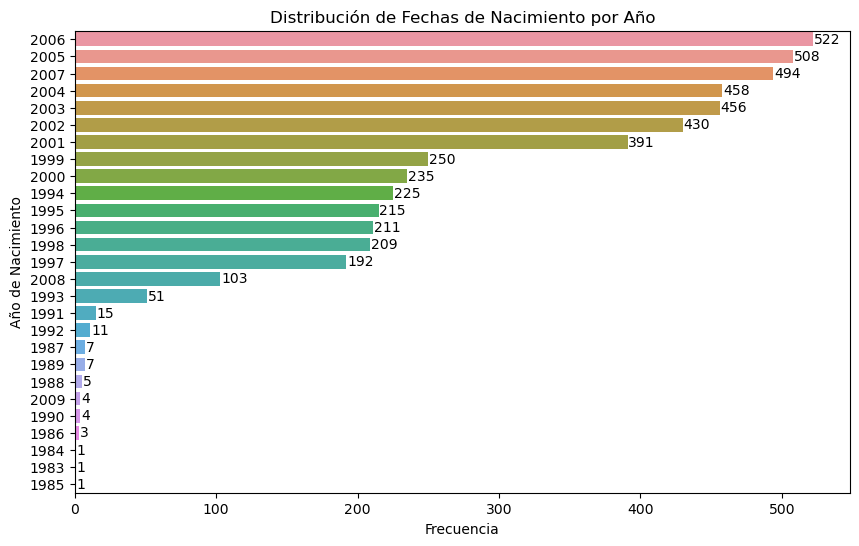

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

enbruto['Año'] = enbruto['Fecha de Nacimiento'].dt.year
conteo_por_año = enbruto['Año'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(y=conteo_por_año.index, x=conteo_por_año.values, orient='h', order=conteo_por_año.index)
plt.title("Distribución de Fechas de Nacimiento por Año")
plt.xlabel("Frecuencia")
plt.ylabel("Año de Nacimiento")

for i, valor in enumerate(conteo_por_año.values):
    plt.text(valor + 0.5, i, str(valor), va='center', fontsize=10)

plt.show()

Una vez más, se constata en la gráfica que todos los años son válidos. Se puede evidenciar, por ejemplo, que la mayoría de los aspirantes nacieron entre 2005 y 2007.

**Paso Tres**: Proseguimos la verificación de la validez de los datos, esta vez con las columnas *Nota Razonamiento Cuantitativo*, *Nota Comprension Lectora* y *Nota Inglés* —deliberadamente sin tildes para evitar conflictos con la codificación—, cuyos valores son admisibles si están dentro del rango 1.0 y 5.0.

Para iniciar, se emplea la función **describe()**, que arroja el promedio, los percentiles al 25, 50 y 75%, la desviación estándar, y los valores máximo y mínimo de cada columna con valores numéricos.

In [11]:
enbruto.describe()

,Fecha de Nacimiento,Nota Razonamiento Cuantitativo,Nota Comprension Lectora,Nota Ingles,Año
count,5009,5009.000000,5009.000000,5009.000000,5009.000000
mean,2002-04-16 03:06:17.320822656,2.547095,2.157257,2.274286,2001.794769
min,1983-11-30 00:00:00,1.000000,1.000000,1.000000,1983.000000
25%,1999-05-29 00:00:00,1.700000,1.500000,1.600000,1999.000000
50%,2003-02-03 00:00:00,2.300000,2.100000,2.200000,2003.000000
75%,2005-09-18 00:00:00,3.000000,2.600000,2.700000,2005.000000
max,2009-02-27 00:00:00,328.000000,35.000000,5.000000,2009.000000
std,NaN,4.715499,1.032118,0.873115,4.206459


**Hallazgos**: Se detectan dos valores anormales: el valor máximo de la columna *Nota Comprension Lectora* es 35, y el de *Nota Razonamiento Cuantitativo*, que llega hasta 328. Tales valores anormales inciden fuertemente en el promedio de esas dos columnas, corrompiendo la información obtenida. En contraste, los valores mínimos de las tres columnas (que equivalen a 1.0) y el valor máximo de *Nota Ingles* (que equivale a 5.0) están dentro del rango permitido.

Para ilustrar lo anterior, se crean tres diagramas de caja, útiles para exponer valores anormales. Por ello, se configura la función **generar_digcaja()**. Dentro, la función **set_theme()** fija el estilo, en este caso, de fondo blanco; *fig* es la figura completa, y la función **subplots()** fija que habrá tres diagramas dentro de una fila en la figura, de quince de ancho por siete de alto. El nd-arreglo Numpy *axes* determina el espacio de cada uno de los tres diagramas: son la unidad de cada gráfico. **boxplot()** genera el diagrama de caja, indicando que serán diagramas verticales al adjudicar al eje *y* la columna del dataframe a graficar. Con **axhline()** se dibujan dos líneas sobre los valores 1.0 y 5.0 de cada diagrama, ambas de color rojo *color='r'*. La función **tight_layout()** gestiona el espacio entre diagramas.

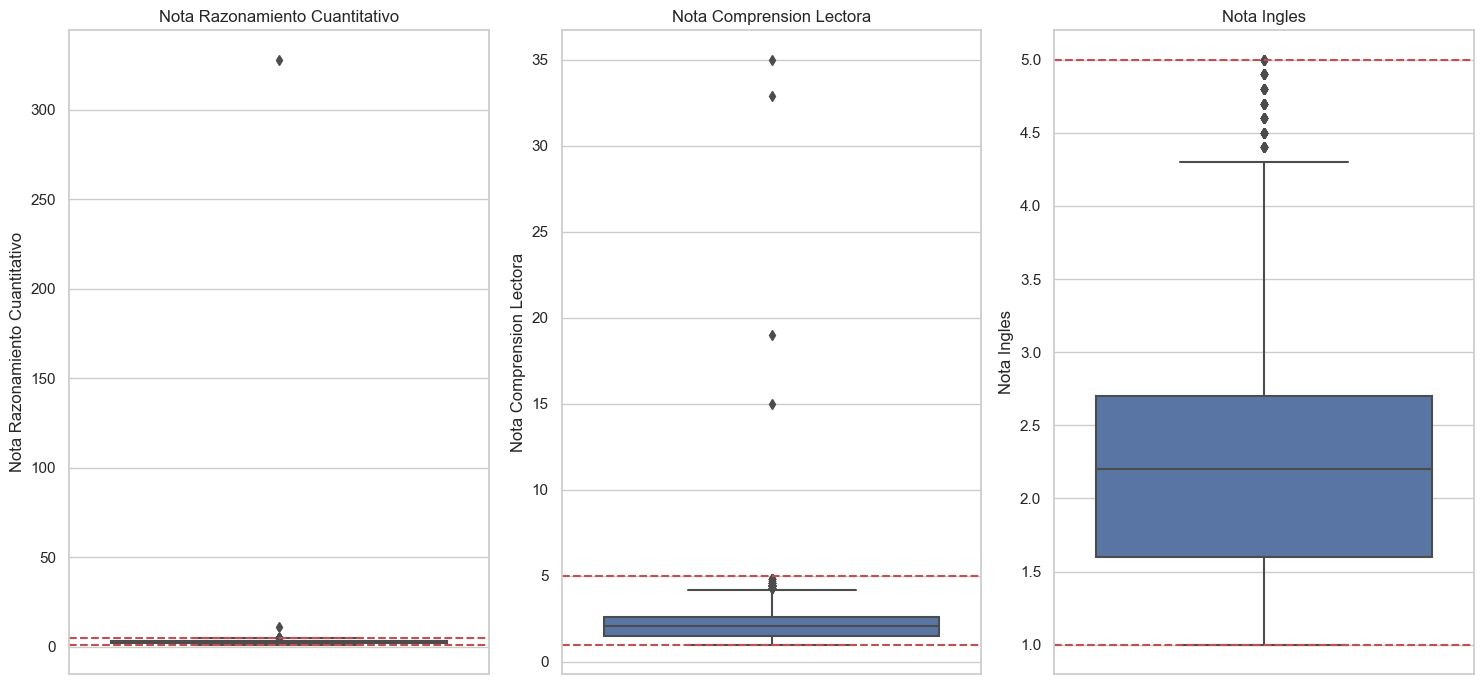

In [12]:
def generar_digcaja(df, columnas):
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, len(columnas), figsize=(15, 7))

    for i, col in enumerate(columnas):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f"{col}")
        axes[i].axhline(y=1.0, color='r', linestyle='--')
        axes[i].axhline(y=5.0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

columnas = ["Nota Razonamiento Cuantitativo", "Nota Comprension Lectora", "Nota Ingles"]
generar_digcaja(enbruto, columnas)

Se puede observar en el en diagrama de *Notas Ingles* que todos los valores están dentro del rango permitido. El valor máximo dentro de *Nota Razonamiento Cuantitativo* está tan alejado del límite superior del rango (5.0), que es imposible divisar la ubicación de línea de la mediana, el rango intercuartílico o la extensión de los bigotes. En cuanto a *Nota Comprension Lectora*, se visualizan al menos cuatro valores que superan el límite superior del rango.

Para localizar todas las filas del dataframe con valores anormales dentro de las tres columnas de notas, se establece una condicional OR que filtre las filas con valores menores a 1.0 y mayores a 5.0, guardando las filas afectadas dentro del dataframe *filas_notas_incorrectas*.

In [13]:
filas_notas_incorrectas = enbruto[
    (enbruto['Nota Razonamiento Cuantitativo'] < 1.0) | 
    (enbruto['Nota Razonamiento Cuantitativo'] > 5.0) |
    (enbruto['Nota Comprension Lectora'] < 1.0) | 
    (enbruto['Nota Comprension Lectora'] > 5.0) |
    (enbruto['Nota Ingles'] < 1.0) | 
    (enbruto['Nota Ingles'] > 5.0)
]

filas_notas_incorrectas

,Sexo,Ciudad,Fecha de Nacimiento,Nota Razonamiento Cuantitativo,Nota Comprension Lectora,Nota Ingles,Año
96,Masculino,Maicao,2007-06-10,2.1,32.9,2.4,2007
910,Masculino,Maicao,2007-01-31,2.2,15.0,2.5,2007
965,Femenino,Aguachica,1994-10-30,328.0,1.1,2.0,1994
4640,Femenino,Girón,2005-03-14,11.0,2.7,1.7,2005
4687,Femenino,Yopal,1999-12-03,2.2,35.0,2.8,1999
4743,Femenino,Sogamoso,1997-03-18,2.1,19.0,2.0,1997


En efecto, ningún valor de *Nota Inglés* presenta anormalidades, lo que no se puede decir de las otras dos columnas. En *Nota Razonamiento Cuantitaivo* hay dos: *328*, antes identificado, y *11*. En *Nota Comprension Lectora* hay cuatro: *32.9*, *15*, *35* y *19*. Cabe resaltar que ninguna de las filas presenta más de un valor anormal.

Las filas con valores *328* y *32.9* se eliminan, dado que no es posible determinar su valor actual. En cuanto a los cuatro restantes, se tomará su anormalidad como omisión del punto decimal para separar la parte entera del resto, y se harán las correcciones. Para ello, se crea el diccionario *correcciones*, donde la clave es una tupla compuesta por el índice y el nombre de la columna, y el valor es la nota corregida (15 a 1.5), el cual se recorre con un ciclo for para hacer los cambios.

In [14]:
enbruto = enbruto.drop(index=[96, 965])

correcciones = {
    (910, 'Nota Comprension Lectora'): 1.5,
    (4640, 'Nota Razonamiento Cuantitativo'): 1.1,
    (4687, 'Nota Comprension Lectora'): 3.5,
    (4743, 'Nota Comprension Lectora'): 1.9
}

for (indice, columna), valor in correcciones.items():
    enbruto.loc[indice, columna] = valor

enbruto.loc[[910, 4640, 4687, 4743]]

,Sexo,Ciudad,Fecha de Nacimiento,Nota Razonamiento Cuantitativo,Nota Comprension Lectora,Nota Ingles,Año
910,Masculino,Maicao,2007-01-31,2.2,1.5,2.5,2007
4640,Femenino,Girón,2005-03-14,1.1,2.7,1.7,2005
4687,Femenino,Yopal,1999-12-03,2.2,3.5,2.8,1999
4743,Femenino,Sogamoso,1997-03-18,2.1,1.9,2.0,1997


En efecto, ya no hay notas inválidas: las columnas comprometidas con valores anormales se eliminaron y corrigieron, según el caso. Las columnas **Nota Razonamiento Cuantitativo**, **Nota Comprension Lectora** y **Nota Ingles** hna sido limpiadas. ✅

Ahora es posible, por ejemplo, construir los diagramas de caja para poder analizarlos. También, los porcentajes de aspirantes que aprobaron y reprobaron cada uno de los tres exámenes. Para ello, se contruyen tres diagramas circulares que lo ilustren. Mediante un ciclo for se recorren las tres columnas en la lista *columnas*, usada y definida previamente. La cantidad de aspirantes reprobados y aprobados se captura mediante la comparación condicional *menor que 3.0* y *mayor o igual a 3.0*, adjudicando True cuando se cumple la condición y False cuando no; la función **sum()** cuenta la cantidad de valores True y asigna el valor a las variables *reprobados* y *aprobados*. El nd-arreglo axes determina el espacio correspondiente a cada diagrama. La función **pie()** genera el diagrama circular propiamente dicho; sus parámetros son la lista *datos*, que contiene la cantidad de aspiarntes aprobados y reprobados; *labels*, que aglutina las etiquetas visibles; *colors*, que define los colores de cada partición; *autopct*, que muestra el porcentaje, definiendo que habrá una cifra decimal después del punto; y *startangle*, que fija el ángulo del inicio, en este caso uno recto. Con **axis()** se asegura la simetría y redondez del diagrama.

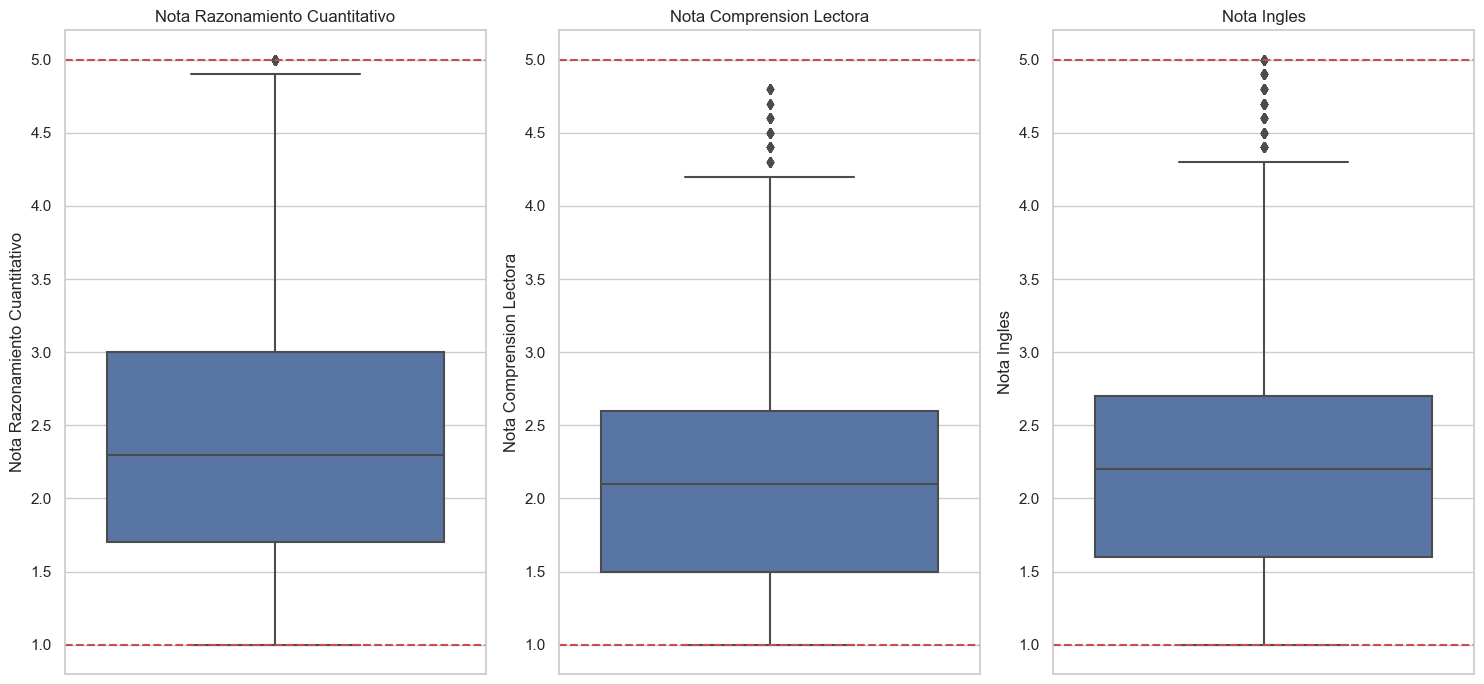

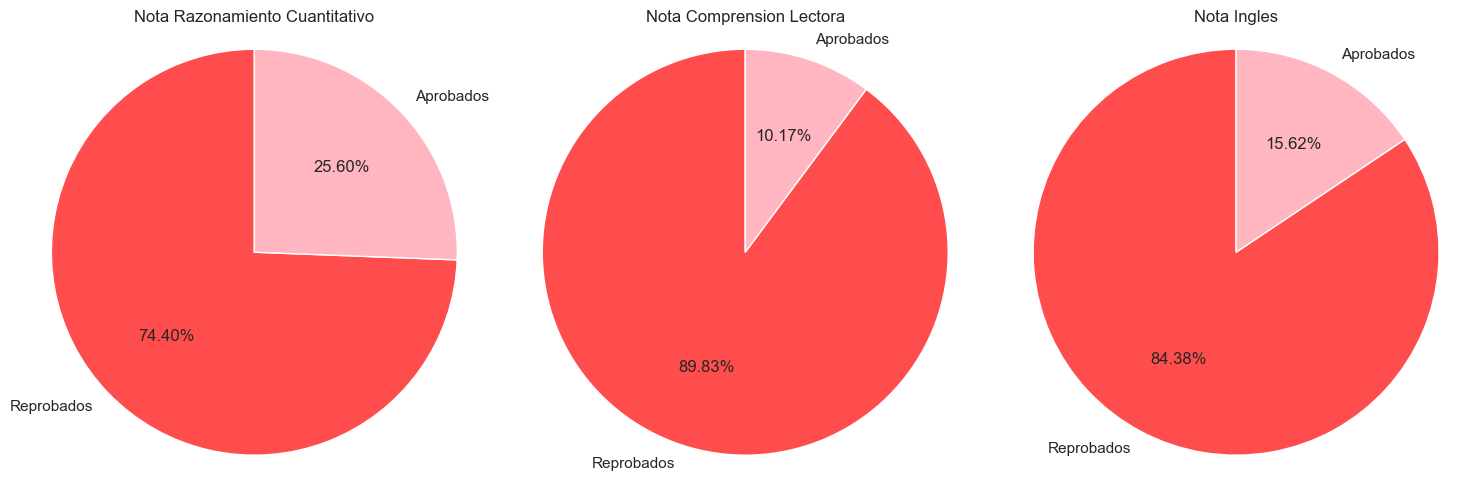

In [15]:
generar_digcaja(enbruto, columnas)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, columna in enumerate(columnas):
    reprobados = (enbruto[columna] < 3.0).sum()
    aprobados = (enbruto[columna] >= 3.0).sum()
    
    datos = [reprobados, aprobados]
    etiquetas = ['Reprobados', 'Aprobados']
    colores = ['#ff4d4d', '#ffb6c1']  #def de colores rojo y rosado

    axes[i].pie(datos, labels=etiquetas, colors=colores, autopct='%1.2f%%', startangle=90)
    axes[i].axis('equal')
    axes[i].set_title(columna)

plt.tight_layout()
plt.show()

En los **diagramas de caja**, se observa, por ejemplo, que hay mayor variabilidad en las notas de Razonamiento Cuantitativo, a juzgar por el grosor de la distancia intercuartil (IQR), a la vez que hay mayor cantidad de valores atípicos en las notas de Inglés y Comprensión Lectora, a juzgar por la distancia entre el bigote superior y el límite superior (5.0). Esto sugiere que los aspirantes tuvieron menos éxito en estas dos competencias que en la primera. 

Lo anterior se confirma con los **diagramas circulares**: se puede observar que solo el 10.1% de los aspirantes aprobaron el examen de Comprensión Lectora, lo que significa que nueve de cada diez individuos lo reprobó. En Inglés, 15.3% aprobó el examen, algo así como tres individuos de cada veinte. En Razonamiento Cuantitativo el panorama es menos negativo: 25.2% aprobaron tal examen, lo que equivale a decir que tres de cada cuatro individuos lo reprobó.

**Paso Cuatro** Proseguimos la verificación de la validez de los datos, esta vez con las columnas *Sexo* y *Ciudad*. Para la primera, los valores válidos son: «Masculino», «Femenino» y «NR/Otro», con mayúscula al inicio y dónde se indica. Para la segunda, los nombres de las ciudades deben ser válidos e iniciar con mayúscula.

Para hacerlo, se emplean las funciones **unique()**, que arroja los valores únicos dentro de la columna, y **value_counts()**, que establece la frecuencia por cada valor único. Ambas, dentro de la función **mostrar_valsxcol()**.

In [16]:
def mostrar_valsxcol(df, col, mostrar_unicos=True, mostrar_valores=True):
    if col not in df.columns:
        print(f"Error: La columna '{col}' no existe en el DataFrame.")
        return
    
    print(f"\n### Información sobre la columna '{col}' ###\n")
    
    if mostrar_unicos:
        print("Valores únicos:")
        print(df[col].unique())
        print("\n" + "═" * 30)
    
    if mostrar_valores:
        print("Frecuencia de los valores:")
        print(df[col].value_counts())
        print("\n" + "═" * 30)

mostrar_valsxcol(enbruto, 'Sexo')
mostrar_valsxcol(enbruto, 'Ciudad')


### Información sobre la columna 'Sexo' ###

Valores únicos:
['Femenino' 'Masculino' 'M' 'F' 'f' 'Masculin' 'NR/Otro' 'femenino' 'NSNR']

══════════════════════════════
Frecuencia de los valores:
Sexo
Femenino     2368
Masculino    2356
M              83
Masculin       58
f              54
femenino       42
F              36
NR/Otro         8
NSNR            2
Name: count, dtype: int64

══════════════════════════════

### Información sobre la columna 'Ciudad' ###

Valores únicos:
['Bucaramanga' 'Maicao' 'Sogamoso' 'Valledupar' 'Tauramena' 'Riohacha'
 'Guateque' 'Girón' 'Yopal' 'Barrancabermeja' 'Aguachica' 'Tibirita'
 'Rioacha' 'Bosconia' 'Bbermeja' 'sogamoso' 'Sogampso']

══════════════════════════════
Frecuencia de los valores:
Ciudad
Bucaramanga        1003
Valledupar          750
Sogamoso            738
Maicao              490
Riohacha            449
Yopal               254
Girón               249
Aguachica           240
Tauramena           230
Barrancabermeja     224
Guateque    

**Hallazgos**: En *Sexo* hay valores erróneos como *m* y *f*, o minúsculas al inicio de la palabra, e incluso palabras fallas como *Masculin* o *NSNR*. En cuanto a *Ciudad*, las ciudades de Riohacha y Barrancabermeja, aunque presentes en su forma correcta, aparecen también como «Rioacha» y «Bbermeja» con alta frecuencia; Sogamoso, por su parte, aparece con letra minúscula al inico y como «Sogampso».

Para hacer las correcciones, se crean dos diccionarios llamados *reemplazo_sexo* y *reemplazo_ciudad*, , donde la clave es el error a corregir y el valor —valga la redundancia— el valor correcto. Dichos diccionarios, junto con el dataframe y la columna, son los parámetros de la función **reemplazat_valores()**, dentro de la cual se emplea la función **replace()** para ejecutar los reemplazos. 

In [17]:
reemplazo_sexo = {'M': 'Masculino', 'Masculin': 'Masculino', 'f': 'Femenino', 'F': 'Femenino', 'femenino': 'Femenino',
                  'NSNR': 'NR/Otro'}
reemplazo_ciudad = {'Rioacha': 'Riohacha', 'Bbermeja': 'Barrancabermeja', 'Sogampso': 'Sogamoso', 'sogamoso': 'Sogamoso'}

def reemplazar_valores(df, columna, diccionario):
    df[columna] = df[columna].replace(diccionario)

reemplazar_valores(enbruto, 'Sexo', reemplazo_sexo)
reemplazar_valores(enbruto, 'Ciudad', reemplazo_ciudad)
mostrar_valsxcol(enbruto, 'Sexo')
mostrar_valsxcol(enbruto, 'Ciudad')


### Información sobre la columna 'Sexo' ###

Valores únicos:
['Femenino' 'Masculino' 'NR/Otro']

══════════════════════════════
Frecuencia de los valores:
Sexo
Femenino     2500
Masculino    2497
NR/Otro        10
Name: count, dtype: int64

══════════════════════════════

### Información sobre la columna 'Ciudad' ###

Valores únicos:
['Bucaramanga' 'Maicao' 'Sogamoso' 'Valledupar' 'Tauramena' 'Riohacha'
 'Guateque' 'Girón' 'Yopal' 'Barrancabermeja' 'Aguachica' 'Tibirita'
 'Bosconia']

══════════════════════════════
Frecuencia de los valores:
Ciudad
Bucaramanga        1003
Valledupar          750
Sogamoso            740
Riohacha            503
Maicao              490
Yopal               254
Girón               249
Barrancabermeja     249
Aguachica           240
Tauramena           230
Guateque            223
Bosconia             44
Tibirita             32
Name: count, dtype: int64

══════════════════════════════


Tras invocar la función **mostrar_valsxcol** para amabas columnas, se evidencia que se corrigieron los valores erróneos, esta vez sin haber eliminado ninguna fila. Las columnas **Sexo** y **Ciudad** han sido limpiadas. ✅

**Verificación**: Ahora, ya es posible hacer operaciones de los aspirantes por sexo. Para ilustrarlo, se procede a crear un diagrama circular. El proceso es similar a los diagramas circulares sobre las columnas de notas, excepto que este es solo uno, no se cuentan valores numéricos sino frecuencias de valores de cadena de texto, y el diagrama tendrá más estilo. Las variables *masculino*, *femenino* y *nrotro* capturan la frecuencia de los aspirantes por sexo, a través de un condicional booleano y la función **sum()**, que cuenta la cantidad de valores True. La función **formato_pctyval()**, con parámetros porcentaje (generado por matplotlib) y la lista *datos* con las frecuencias de cada valor único dentro de la columna *Sexo*, devuelve el porcentaje y la frecuencia de cada partición del diagrama. En cuanto a los estilos, dentro de **pie()**, el parámetro *shadow* se fija en True para mostrar sombreado hacia el lado izquierdo; *explode*, para poner espacio entre las particiones; y *autopct*, a través del cual se visualiza el porcentaje, con la palabra clave *lambda*, empleada para funciones de una sola línea, junto con pct, conforman una función anónima. Se supone que recibe el valor del porcentaje (pct) solamente, pero en vez de ello invoca la función *formato_pctyval* para mostrar porcentajes y frecuencias. Dentro de **title()**, el parámetro *fontdict* fija el tamaño de la fuente y activa la negrilla.

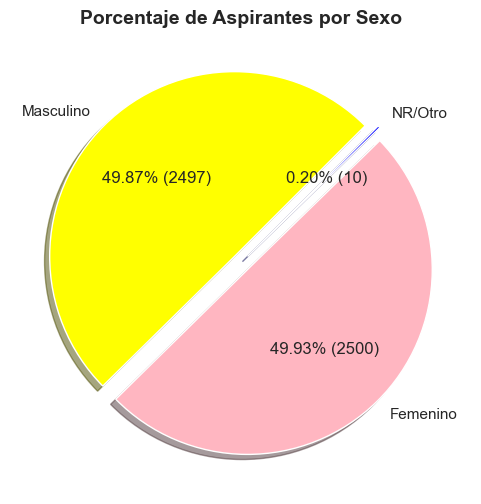

In [18]:
masculino = (enbruto['Sexo'] == 'Masculino').sum()
femenino = (enbruto['Sexo'] == 'Femenino').sum()
nrotro = (enbruto['Sexo'] == 'NR/Otro').sum()

datos = [masculino, femenino, nrotro]
etiquetas = ['Masculino', 'Femenino', 'NR/Otro']
colores = ['yellow', '#ffb6c1', 'blue']

def formato_pctyval(pct, datos):
    total = sum(datos)
    valor = round(pct * total / 100)
    return f'{pct:.2f}% ({valor})'

plt.figure(figsize=(6, 6))
plt.pie(datos, labels=etiquetas, colors=colores, autopct=lambda pct: formato_pctyval(pct, datos), 
        startangle=45, explode=(0.05, 0.05, 0.05), shadow=True)
plt.title('Porcentaje de Aspirantes por Sexo', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

Los porcentajes de aspirantes de sexo masculino y femenino son similares, a la vez que el porcentaje de aspirantes que optaron por no responder o cuyo sexo está fuera del sistema binario masculino-femenino es ínfimo.

Con respecto a *Ciudad*, es posible ahora visualizar cuántos 

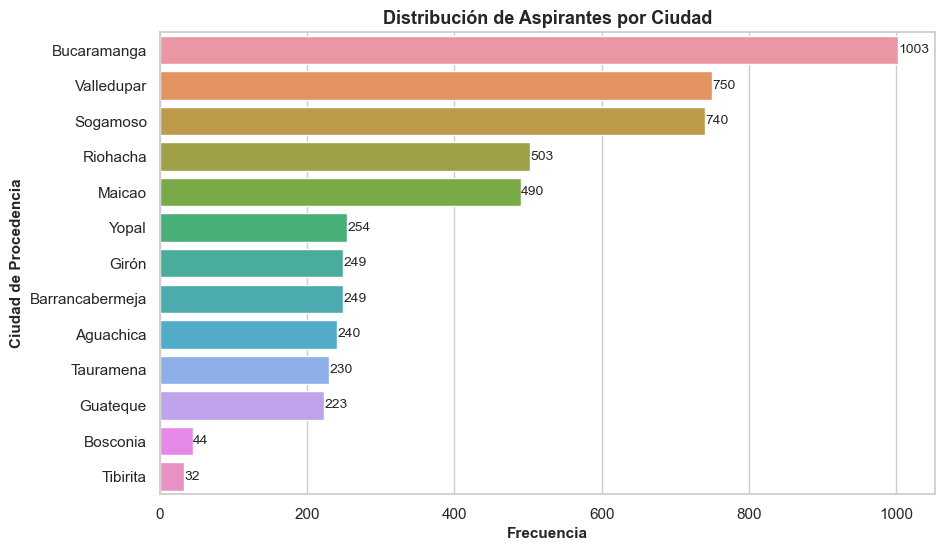

In [19]:
conteo_por_ciudad = enbruto['Ciudad'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=conteo_por_ciudad.index, x=conteo_por_ciudad.values, orient='h', order=conteo_por_ciudad.index)
plt.title("Distribución de Aspirantes por Ciudad", fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.xlabel("Frecuencia", fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("Ciudad de Procedencia", fontdict={'fontsize': 11, 'fontweight': 'bold'})

for i, valor in enumerate(conteo_por_ciudad.values):
    plt.text(valor + 0.5, i, str(valor), va='center', fontsize=10)

plt.show()

De este modo, todas las columnas del dataFrame *enbruto* han sido «limpiadas». Esto significa que **los datos están aptos para ser analizados**

In [20]:
enbruto.drop(columns=['Año'], inplace=True)
contar_columnas(enbruto)
enbruto.describe()

Las columnas del dataframe son: ['Sexo', 'Ciudad', 'Fecha de Nacimiento', 'Nota Razonamiento Cuantitativo', 'Nota Comprension Lectora', 'Nota Ingles']
El dataframe tiene 6 columnas.


,Fecha de Nacimiento,Nota Razonamiento Cuantitativo,Nota Comprension Lectora,Nota Ingles
count,5007,5007.000000,5007.000000,5007.000000
mean,2002-04-16 07:09:05.715997696,2.480208,2.138926,2.274316
min,1983-11-30 00:00:00,1.000000,1.000000,1.000000
25%,1999-05-29 00:00:00,1.700000,1.500000,1.600000
50%,2003-02-03 00:00:00,2.300000,2.100000,2.200000
75%,2005-09-17 12:00:00,3.000000,2.600000,2.700000
max,2009-02-27 00:00:00,5.000000,4.800000,5.000000
std,NaN,1.033402,0.756115,0.873279


El total de filas quedó en **5007**. A través de la función **describe()**, se advierte que en la columna *Nota Comprension Lectora* ningún aspirante obtuvo nota perfecta, pues la nota mayor es *4.8*. También, que ninguno de los promedios de las tres columnas de notas supera 2.5, la mitad de la nota máxima posible, no digamos ya 3.0, la nota mínima para aprobar.

Para culminar, los datos ya «limpios» se almacenarán en un archivo de extensión .xlsx (de Excel), para poder ser usados para su análisis.

In [21]:
enbruto.to_excel('datos_analisis.xlsx', index=False)